# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [8]:
# data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

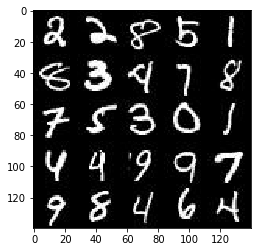

In [9]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

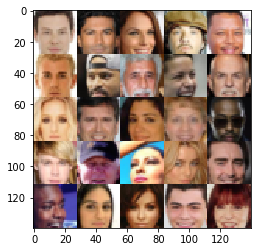

In [10]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [11]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.1.0


/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:14: UserWarning: No GPU found. Please use a GPU to train your neural network.


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [12]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    real_input = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name='real_input')
    z_input = tf.placeholder(tf.float32, (None, z_dim), name='z_input')
    learning_rate = tf.placeholder(tf.float32, name='learning_rate')

    return real_input, z_input, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the generator, tensor logits of the generator).

In [13]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    with tf.variable_scope("discriminator", reuse=reuse):
        alpha=0.1
        
        # print(images.shape)
        
        x = tf.layers.conv2d(images, 64, 5, strides=2, padding='SAME', kernel_initializer=tf.contrib.layers.xavier_initializer(uniform=True, seed=None, dtype=tf.float32))
        # print(x.shape)
        relu = tf.maximum(alpha * x, x)
                
        x = tf.layers.conv2d(relu, 128, 5, strides=2, padding='SAME', kernel_initializer=tf.contrib.layers.xavier_initializer(uniform=True, seed=None, dtype=tf.float32))
        # print(x.shape)
        bn = tf.layers.batch_normalization(x, training=True)
        relu = tf.maximum(alpha * bn, bn)
                
        x = tf.layers.conv2d(relu, 256, 5, strides=2, padding='SAME', kernel_initializer=tf.contrib.layers.xavier_initializer(uniform=True, seed=None, dtype=tf.float32))
        # print(x.shape)
        bn = tf.layers.batch_normalization(x, training=True)
        relu = tf.maximum(alpha * bn, bn)
        
        relu = tf.nn.dropout(relu, keep_prob=0.95)
        
        # Flatten it
        flat = tf.reshape(relu, (-1, 4*2*256))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)
        
        return out, logits

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

AttributeError: module 'pandas' has no attribute 'computation'

### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [ ]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    alpha = 0.1
    
    with tf.variable_scope('generator', reuse=not is_train):
        
        # First fully connected layer
        x = tf.layers.dense(z, 4*4*512)
        
        x = tf.reshape(x, (-1, 4, 4, 512))
        # print(x.shape)
        x = tf.layers.batch_normalization(x, training=is_train)
        x = tf.maximum(alpha * x, x)
        
        x = tf.layers.conv2d_transpose(x, 256, 4, strides=1, padding='valid', kernel_initializer=tf.contrib.layers.xavier_initializer(uniform=True, seed=None, dtype=tf.float32))
        # print(x.shape)
        x = tf.layers.batch_normalization(x, training=is_train)
        x = tf.maximum(alpha * x, x)
        
        x = tf.layers.conv2d_transpose(x, 128, 4, strides=1, padding='same', kernel_initializer=tf.contrib.layers.xavier_initializer(uniform=True, seed=None, dtype=tf.float32))
        # print(x.shape)
        x = tf.layers.batch_normalization(x, training=is_train)
        x = tf.maximum(alpha * x, x)
        
        x = tf.layers.conv2d_transpose(x, 64, 5, strides=2, padding='same', kernel_initializer=tf.contrib.layers.xavier_initializer(uniform=True, seed=None, dtype=tf.float32))
        # print(x.shape)
        x = tf.layers.batch_normalization(x, training=is_train)
        x = tf.maximum(alpha * x, x)

        x = tf.layers.conv2d_transpose(x, 32, 5, strides=2, padding='same', kernel_initializer=tf.contrib.layers.xavier_initializer(uniform=True, seed=None, dtype=tf.float32))
        # print(x.shape)
        x = tf.layers.batch_normalization(x, training=is_train)
        x = tf.maximum(alpha * x, x)

        x = tf.nn.dropout(x, keep_prob=0.95)
        
        # Output layer
        x = tf.layers.conv2d_transpose(x, out_channel_dim, 5, strides=2, padding='same')
        # print(x.shape)
        x = tf.reshape(x, (-1, 28, 28, out_channel_dim))
        
        return tf.tanh(x)

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [ ]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    alpha = 0.1
    g_model = generator(input_z, out_channel_dim, is_train=True)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)

    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake

    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [ ]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [ ]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [ ]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    count_batch = 0
    show_every = 100
    print_every = 10
    n_images = 20
        
    # tf.reset_default_graph()
    
    input_real, input_z, lr = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)
    d_loss, g_loss = model_loss(input_real, input_z, data_shape[3])
    d_training, g_training = model_opt(d_loss, g_loss, lr, beta1)
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                count_batch += 1 
                
                print(batch_images)
                batch_images *= 2
                print(batch_images)
                
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                
                _ = sess.run(d_training, feed_dict={input_real: batch_images, input_z: batch_z, lr: learning_rate})
                _ = sess.run(g_training, feed_dict={input_z: batch_z, input_real: batch_images, lr: learning_rate})
                
                if count_batch % print_every == 0:
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})

                    print("Epoch {}/{}|Batch {}...".format(epoch_i+1, epoch_count, count_batch),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                
                if count_batch % show_every == 0:
                    show_generator_output(sess, n_images, input_z, data_shape[3], data_image_mode) 


### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2|Batch 10... Discriminator Loss: 0.1575... Generator Loss: 2.7803
Epoch 1/2|Batch 20... Discriminator Loss: 0.1212... Generator Loss: 3.0863
Epoch 1/2|Batch 40... Discriminator Loss: 0.3149... Generator Loss: 2.2885
Epoch 1/2|Batch 50... Discriminator Loss: 0.2872... Generator Loss: 2.0953
Epoch 1/2|Batch 60... Discriminator Loss: 0.3215... Generator Loss: 1.7438
Epoch 1/2|Batch 70... Discriminator Loss: 0.4361... Generator Loss: 4.4085
Epoch 1/2|Batch 80... Discriminator Loss: 0.3719... Generator Loss: 2.4324
Epoch 1/2|Batch 90... Discriminator Loss: 0.2588... Generator Loss: 2.1455
Epoch 1/2|Batch 100... Discriminator Loss: 0.2116... Generator Loss: 2.8973


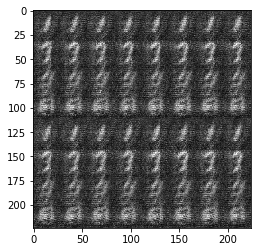

Epoch 1/2|Batch 110... Discriminator Loss: 0.3007... Generator Loss: 2.1577
Epoch 1/2|Batch 120... Discriminator Loss: 1.0367... Generator Loss: 4.6612
Epoch 1/2|Batch 130... Discriminator Loss: 0.3730... Generator Loss: 1.9688
Epoch 1/2|Batch 140... Discriminator Loss: 0.2989... Generator Loss: 2.8509
Epoch 1/2|Batch 150... Discriminator Loss: 0.3621... Generator Loss: 2.7427
Epoch 1/2|Batch 160... Discriminator Loss: 0.3208... Generator Loss: 2.5216
Epoch 1/2|Batch 170... Discriminator Loss: 0.3183... Generator Loss: 2.0344
Epoch 1/2|Batch 180... Discriminator Loss: 0.3470... Generator Loss: 2.2201
Epoch 1/2|Batch 190... Discriminator Loss: 0.3745... Generator Loss: 2.4994
Epoch 1/2|Batch 200... Discriminator Loss: 0.2792... Generator Loss: 1.9665


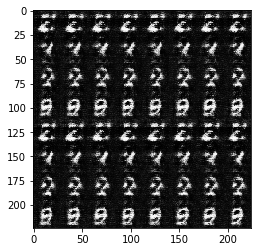

Epoch 1/2|Batch 210... Discriminator Loss: 0.3243... Generator Loss: 3.3586
Epoch 1/2|Batch 220... Discriminator Loss: 0.2254... Generator Loss: 2.8877
Epoch 1/2|Batch 230... Discriminator Loss: 0.4219... Generator Loss: 1.2927
Epoch 1/2|Batch 240... Discriminator Loss: 0.3238... Generator Loss: 2.7614
Epoch 1/2|Batch 250... Discriminator Loss: 0.5903... Generator Loss: 2.2612
Epoch 1/2|Batch 260... Discriminator Loss: 0.3462... Generator Loss: 1.8117
Epoch 1/2|Batch 270... Discriminator Loss: 0.4597... Generator Loss: 1.4861
Epoch 1/2|Batch 280... Discriminator Loss: 0.3042... Generator Loss: 2.2729
Epoch 1/2|Batch 290... Discriminator Loss: 0.4735... Generator Loss: 4.2224
Epoch 1/2|Batch 300... Discriminator Loss: 0.4823... Generator Loss: 1.2403


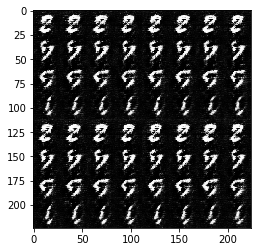

Epoch 1/2|Batch 310... Discriminator Loss: 0.8462... Generator Loss: 4.3451
Epoch 1/2|Batch 320... Discriminator Loss: 0.3958... Generator Loss: 1.6056
Epoch 1/2|Batch 330... Discriminator Loss: 0.2959... Generator Loss: 3.5543
Epoch 1/2|Batch 340... Discriminator Loss: 0.2720... Generator Loss: 3.6151
Epoch 1/2|Batch 350... Discriminator Loss: 0.4092... Generator Loss: 2.6149
Epoch 1/2|Batch 360... Discriminator Loss: 0.2576... Generator Loss: 2.1700
Epoch 1/2|Batch 370... Discriminator Loss: 0.3427... Generator Loss: 1.6410
Epoch 1/2|Batch 380... Discriminator Loss: 0.4379... Generator Loss: 1.7179
Epoch 1/2|Batch 390... Discriminator Loss: 0.4206... Generator Loss: 1.5438
Epoch 1/2|Batch 400... Discriminator Loss: 0.4279... Generator Loss: 2.4457


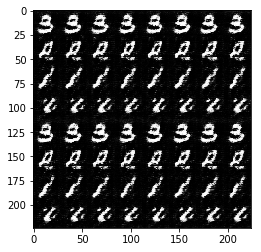

Epoch 1/2|Batch 410... Discriminator Loss: 0.2969... Generator Loss: 2.1780
Epoch 1/2|Batch 420... Discriminator Loss: 0.2589... Generator Loss: 2.3743
Epoch 1/2|Batch 430... Discriminator Loss: 0.3508... Generator Loss: 2.2245
Epoch 1/2|Batch 440... Discriminator Loss: 0.3688... Generator Loss: 1.6516
Epoch 1/2|Batch 450... Discriminator Loss: 2.3812... Generator Loss: 8.2352
Epoch 1/2|Batch 460... Discriminator Loss: 1.1105... Generator Loss: 0.6051
Epoch 2/2|Batch 470... Discriminator Loss: 0.3387... Generator Loss: 1.8293
Epoch 2/2|Batch 480... Discriminator Loss: 0.2995... Generator Loss: 2.3896
Epoch 2/2|Batch 490... Discriminator Loss: 0.3218... Generator Loss: 2.2765
Epoch 2/2|Batch 500... Discriminator Loss: 0.4057... Generator Loss: 3.3510


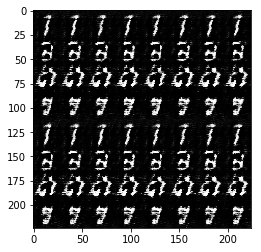

Epoch 2/2|Batch 510... Discriminator Loss: 0.2287... Generator Loss: 3.3183
Epoch 2/2|Batch 520... Discriminator Loss: 0.2748... Generator Loss: 2.2330
Epoch 2/2|Batch 530... Discriminator Loss: 0.3556... Generator Loss: 1.6166
Epoch 2/2|Batch 540... Discriminator Loss: 0.3708... Generator Loss: 2.0829
Epoch 2/2|Batch 550... Discriminator Loss: 0.1850... Generator Loss: 4.0313
Epoch 2/2|Batch 560... Discriminator Loss: 0.3043... Generator Loss: 2.7598
Epoch 2/2|Batch 570... Discriminator Loss: 0.2291... Generator Loss: 3.4464
Epoch 2/2|Batch 580... Discriminator Loss: 0.4323... Generator Loss: 3.1147
Epoch 2/2|Batch 590... Discriminator Loss: 0.2368... Generator Loss: 2.5229
Epoch 2/2|Batch 600... Discriminator Loss: 0.1947... Generator Loss: 2.7458


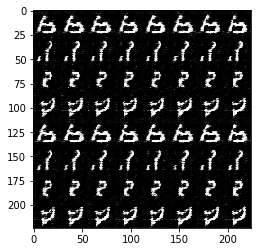

Epoch 2/2|Batch 610... Discriminator Loss: 0.2142... Generator Loss: 3.0434
Epoch 2/2|Batch 620... Discriminator Loss: 0.6007... Generator Loss: 1.2115
Epoch 2/2|Batch 630... Discriminator Loss: 0.2130... Generator Loss: 3.0303
Epoch 2/2|Batch 640... Discriminator Loss: 0.4667... Generator Loss: 1.4910
Epoch 2/2|Batch 650... Discriminator Loss: 0.2671... Generator Loss: 2.1902
Epoch 2/2|Batch 660... Discriminator Loss: 0.2537... Generator Loss: 2.3032
Epoch 2/2|Batch 670... Discriminator Loss: 0.2387... Generator Loss: 2.1986
Epoch 2/2|Batch 680... Discriminator Loss: 0.3602... Generator Loss: 3.0430
Epoch 2/2|Batch 690... Discriminator Loss: 0.2480... Generator Loss: 3.3739
Epoch 2/2|Batch 700... Discriminator Loss: 0.2965... Generator Loss: 3.2467


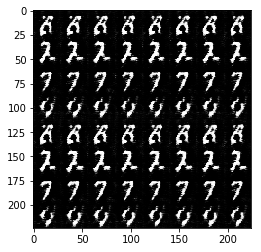

Epoch 2/2|Batch 710... Discriminator Loss: 0.3756... Generator Loss: 2.6476
Epoch 2/2|Batch 720... Discriminator Loss: 0.1499... Generator Loss: 2.9106
Epoch 2/2|Batch 730... Discriminator Loss: 0.2348... Generator Loss: 3.3075
Epoch 2/2|Batch 740... Discriminator Loss: 0.2487... Generator Loss: 3.0495
Epoch 2/2|Batch 750... Discriminator Loss: 0.2039... Generator Loss: 2.8593
Epoch 2/2|Batch 760... Discriminator Loss: 0.3095... Generator Loss: 4.9208
Epoch 2/2|Batch 770... Discriminator Loss: 0.8292... Generator Loss: 6.4212
Epoch 2/2|Batch 780... Discriminator Loss: 0.2516... Generator Loss: 2.5842
Epoch 2/2|Batch 790... Discriminator Loss: 0.2308... Generator Loss: 2.3123
Epoch 2/2|Batch 800... Discriminator Loss: 0.3796... Generator Loss: 5.2828


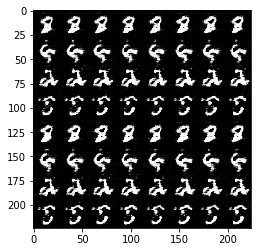

Epoch 2/2|Batch 810... Discriminator Loss: 0.2627... Generator Loss: 1.8595
Epoch 2/2|Batch 820... Discriminator Loss: 0.1532... Generator Loss: 3.5654
Epoch 2/2|Batch 830... Discriminator Loss: 0.2048... Generator Loss: 2.6254
Epoch 2/2|Batch 840... Discriminator Loss: 0.1939... Generator Loss: 2.8433
Epoch 2/2|Batch 850... Discriminator Loss: 0.1213... Generator Loss: 3.4821
Epoch 2/2|Batch 860... Discriminator Loss: 0.1688... Generator Loss: 2.8627
Epoch 2/2|Batch 870... Discriminator Loss: 0.2197... Generator Loss: 2.2975
Epoch 2/2|Batch 880... Discriminator Loss: 0.2455... Generator Loss: 3.5856
Epoch 2/2|Batch 890... Discriminator Loss: 0.2587... Generator Loss: 2.6317
Epoch 2/2|Batch 900... Discriminator Loss: 3.4845... Generator Loss: 11.2387


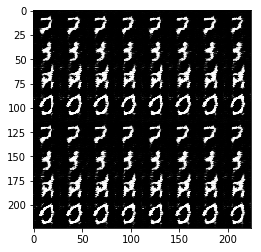

Epoch 2/2|Batch 910... Discriminator Loss: 0.2423... Generator Loss: 2.7019
Epoch 2/2|Batch 920... Discriminator Loss: 0.2679... Generator Loss: 2.9054
Epoch 2/2|Batch 930... Discriminator Loss: 0.2004... Generator Loss: 2.7572


In [ ]:
batch_size = 64
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1|Batch 10... Discriminator Loss: 0.3020... Generator Loss: 2.1255
Epoch 1/1|Batch 20... Discriminator Loss: 0.1817... Generator Loss: 2.4717
Epoch 1/1|Batch 30... Discriminator Loss: 0.1248... Generator Loss: 3.2374
Epoch 1/1|Batch 40... Discriminator Loss: 0.0979... Generator Loss: 3.1390
Epoch 1/1|Batch 50... Discriminator Loss: 0.1008... Generator Loss: 3.7044
Epoch 1/1|Batch 60... Discriminator Loss: 0.2287... Generator Loss: 2.6218
Epoch 1/1|Batch 70... Discriminator Loss: 0.2549... Generator Loss: 2.2117
Epoch 1/1|Batch 80... Discriminator Loss: 0.2235... Generator Loss: 2.3014
Epoch 1/1|Batch 90... Discriminator Loss: 0.3071... Generator Loss: 1.8960
Epoch 1/1|Batch 100... Discriminator Loss: 0.3059... Generator Loss: 3.7909


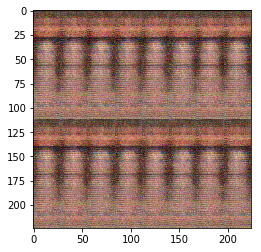

Epoch 1/1|Batch 110... Discriminator Loss: 0.2103... Generator Loss: 3.4262
Epoch 1/1|Batch 120... Discriminator Loss: 0.2708... Generator Loss: 3.9154
Epoch 1/1|Batch 130... Discriminator Loss: 0.2345... Generator Loss: 2.3339
Epoch 1/1|Batch 140... Discriminator Loss: 0.1450... Generator Loss: 2.7679
Epoch 1/1|Batch 150... Discriminator Loss: 0.1077... Generator Loss: 3.6005
Epoch 1/1|Batch 160... Discriminator Loss: 0.1199... Generator Loss: 2.8306
Epoch 1/1|Batch 170... Discriminator Loss: 0.1337... Generator Loss: 3.3625
Epoch 1/1|Batch 180... Discriminator Loss: 0.5819... Generator Loss: 1.2653
Epoch 1/1|Batch 190... Discriminator Loss: 0.1417... Generator Loss: 3.4022
Epoch 1/1|Batch 200... Discriminator Loss: 0.1492... Generator Loss: 2.9428


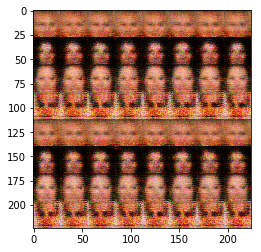

Epoch 1/1|Batch 210... Discriminator Loss: 0.1398... Generator Loss: 3.3117
Epoch 1/1|Batch 220... Discriminator Loss: 0.1243... Generator Loss: 3.2022
Epoch 1/1|Batch 230... Discriminator Loss: 0.1090... Generator Loss: 3.4927
Epoch 1/1|Batch 240... Discriminator Loss: 0.0687... Generator Loss: 4.1530
Epoch 1/1|Batch 250... Discriminator Loss: 0.0898... Generator Loss: 3.2322
Epoch 1/1|Batch 260... Discriminator Loss: 0.0914... Generator Loss: 3.3239
Epoch 1/1|Batch 270... Discriminator Loss: 0.0835... Generator Loss: 4.2917
Epoch 1/1|Batch 280... Discriminator Loss: 0.0681... Generator Loss: 3.8415
Epoch 1/1|Batch 290... Discriminator Loss: 0.0910... Generator Loss: 5.5806
Epoch 1/1|Batch 300... Discriminator Loss: 0.0531... Generator Loss: 4.2602


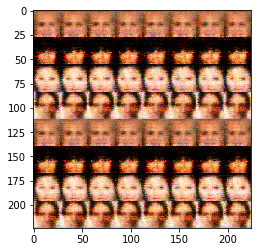

Epoch 1/1|Batch 310... Discriminator Loss: 0.2771... Generator Loss: 2.7150
Epoch 1/1|Batch 320... Discriminator Loss: 0.1846... Generator Loss: 3.0308
Epoch 1/1|Batch 330... Discriminator Loss: 0.0997... Generator Loss: 3.8070
Epoch 1/1|Batch 340... Discriminator Loss: 0.1103... Generator Loss: 3.3486
Epoch 1/1|Batch 350... Discriminator Loss: 0.0772... Generator Loss: 3.6069
Epoch 1/1|Batch 360... Discriminator Loss: 0.1005... Generator Loss: 3.9174
Epoch 1/1|Batch 370... Discriminator Loss: 0.0927... Generator Loss: 3.5691
Epoch 1/1|Batch 380... Discriminator Loss: 0.0972... Generator Loss: 4.9418
Epoch 1/1|Batch 390... Discriminator Loss: 0.0545... Generator Loss: 4.1614
Epoch 1/1|Batch 400... Discriminator Loss: 0.0681... Generator Loss: 4.2034


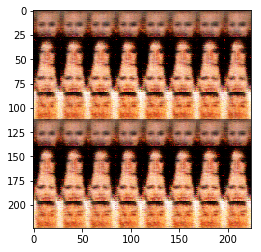

Epoch 1/1|Batch 410... Discriminator Loss: 0.0460... Generator Loss: 4.0433
Epoch 1/1|Batch 420... Discriminator Loss: 0.0565... Generator Loss: 4.2707
Epoch 1/1|Batch 430... Discriminator Loss: 0.0344... Generator Loss: 4.6544
Epoch 1/1|Batch 440... Discriminator Loss: 0.0400... Generator Loss: 4.5160
Epoch 1/1|Batch 450... Discriminator Loss: 0.0557... Generator Loss: 4.1276
Epoch 1/1|Batch 460... Discriminator Loss: 0.0349... Generator Loss: 4.7577
Epoch 1/1|Batch 470... Discriminator Loss: 0.0335... Generator Loss: 4.3384
Epoch 1/1|Batch 480... Discriminator Loss: 0.0265... Generator Loss: 4.7509
Epoch 1/1|Batch 490... Discriminator Loss: 0.0352... Generator Loss: 4.7045
Epoch 1/1|Batch 500... Discriminator Loss: 0.0240... Generator Loss: 4.7511


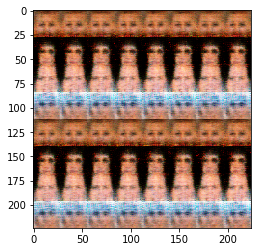

Epoch 1/1|Batch 510... Discriminator Loss: 0.0427... Generator Loss: 4.4517
Epoch 1/1|Batch 520... Discriminator Loss: 0.0416... Generator Loss: 4.4492
Epoch 1/1|Batch 530... Discriminator Loss: 0.0401... Generator Loss: 4.2380
Epoch 1/1|Batch 540... Discriminator Loss: 0.0568... Generator Loss: 5.0186
Epoch 1/1|Batch 550... Discriminator Loss: 0.3509... Generator Loss: 2.6664
Epoch 1/1|Batch 560... Discriminator Loss: 0.1340... Generator Loss: 3.1071
Epoch 1/1|Batch 570... Discriminator Loss: 0.1615... Generator Loss: 2.8122
Epoch 1/1|Batch 580... Discriminator Loss: 0.0858... Generator Loss: 3.5265
Epoch 1/1|Batch 590... Discriminator Loss: 0.0781... Generator Loss: 3.5718
Epoch 1/1|Batch 600... Discriminator Loss: 0.0984... Generator Loss: 3.2359


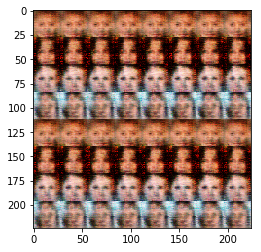

Epoch 1/1|Batch 610... Discriminator Loss: 0.0909... Generator Loss: 3.3263
Epoch 1/1|Batch 620... Discriminator Loss: 0.0565... Generator Loss: 3.9367
Epoch 1/1|Batch 630... Discriminator Loss: 0.0600... Generator Loss: 4.0370
Epoch 1/1|Batch 640... Discriminator Loss: 0.0699... Generator Loss: 3.7855
Epoch 1/1|Batch 650... Discriminator Loss: 0.0591... Generator Loss: 4.0570
Epoch 1/1|Batch 660... Discriminator Loss: 0.0433... Generator Loss: 4.1659
Epoch 1/1|Batch 670... Discriminator Loss: 0.0401... Generator Loss: 4.2977
Epoch 1/1|Batch 680... Discriminator Loss: 0.0227... Generator Loss: 5.1295
Epoch 1/1|Batch 690... Discriminator Loss: 0.0444... Generator Loss: 4.3137
Epoch 1/1|Batch 700... Discriminator Loss: 0.0306... Generator Loss: 4.9490


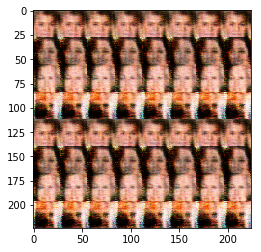

In [ ]:
batch_size = 64
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.